In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# 필요 모듈 임포트
import imblearn
print(imblearn.__version__)

from collections import Counter

0.7.0


In [16]:
# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    plt.bar(counter.keys(), counter.values())
    plt.show()    

In [4]:
enf = pd.read_csv('encoding_finished_v2.csv')
enf= enf.drop(columns =['Unnamed: 0'], axis=1) #필요없는 컬럼 삭제
enf.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,1,1,0,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,0,0,1,0,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,1,1,0,0,0,3,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,0,0,0,1,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,1,1,0,0,0,2,0,0


# 특성(x)과 타겟(y)분리

In [5]:
enf.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Attrition_Flag_Attrited Customer',
       'new_income_category', 'new_edu_category', 'new_card_category'],
      dtype='object')

In [6]:
y = enf['Attrition_Flag_Attrited Customer']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag_Attrited Customer, Length: 10127, dtype: int64

In [7]:
x = enf[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category']]
x.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,42,1.625,0.061,1,1,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,33,3.714,0.105,0,0,1,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,20,2.333,0.000,1,1,0,0,3,3,0


In [8]:
x.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')

# train, test셋 분리

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
x_train.shape, x_test.shape

((7088, 21), (3039, 21))

In [11]:
x_test.shape[0]/(x_train.shape[0]+x_test.shape[0])

0.3000888713340575

# 클래스 균형도 확인 및 SMOTE 적용

Class=0, n=5957 (84.043%)
Class=1, n=1131 (15.957%)


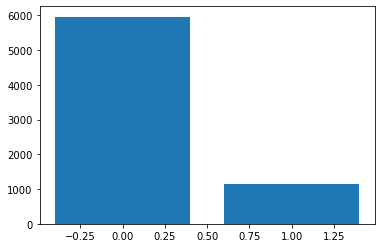

In [17]:
# 클래스 균형도 확인
count_and_plot(y_train)

Class=0, n=5957 (50.000%)
Class=1, n=5957 (50.000%)


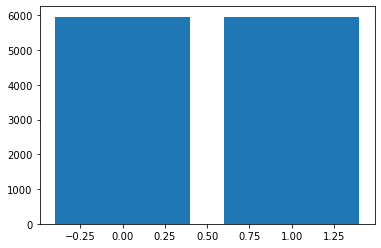

In [18]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote_x_train, smote_y_train = SMOTE(random_state=0).fit_resample(x_train, y_train)
count_and_plot(smote_y_train)

In [19]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(y_train).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smote_y_train).sum()))

원본 데이터의 클래스 비율 
0    5957
1    1131
dtype: int64

SMOTE 결과 
0    5957
1    5957
dtype: int64


# 1. 로지스틱 회귀

In [20]:
from sklearn.linear_model import LogisticRegression

lgr =LogisticRegression()
lgr.fit(smote_x_train, smote_y_train)
lgr_ypred = lgr.predict(x_test)
lgr_yproba = lgr.predict_proba(x_test)

In [21]:
print('             분류 보고서')
print(classification_report(y_test, lgr_ypred))
print('정확도: ',accuracy_score(y_test, lgr_ypred))
print('재현율: ',recall_score(y_test, lgr_ypred))
print('정밀도: ',precision_score(y_test, lgr_ypred))
print('f1점수: ',f1_score(y_test, lgr_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, lgr_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      2543
           1       0.42      0.70      0.53       496

    accuracy                           0.80      3039
   macro avg       0.68      0.76      0.70      3039
weighted avg       0.85      0.80      0.81      3039

정확도:  0.7956564659427443
재현율:  0.7016129032258065
정밀도:  0.4238733252131547
f1점수:  0.5284738041002278
ROC-AUC점수:  0.7578060583765682


# 2.KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier=KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(smote_x_train, smote_y_train)
knn_ypred = knn_classifier.predict(x_test)
knn_yproba = knn_classifier.predict_proba(x_test)

In [28]:
print('             분류 보고서')
print(classification_report(y_test, knn_ypred)) 
print('정확도: ',accuracy_score(y_test, knn_ypred))
print('재현율: ',recall_score(y_test, knn_ypred))
print('정밀도: ',precision_score(y_test, knn_ypred))
print('f1점수: ',f1_score(y_test, knn_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, knn_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2543
           1       0.59      0.60      0.60       496

    accuracy                           0.87      3039
   macro avg       0.76      0.76      0.76      3039
weighted avg       0.87      0.87      0.87      3039

정확도:  0.8677196446199408
재현율:  0.6028225806451613
정밀도:  0.5932539682539683
f1점수:  0.598
ROC-AUC점수:  0.7611045659812514


In [29]:
import matplotlib.pyplot as plt

k_list = range(1,20)
acc = [] #정확도를 저장할 리스트 초기화

for k in k_list:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(smote_x_train, smote_y_train)
  acc.append(knn_classifier.score(x_test, y_test))#계산된 정확도를 차례로 저장

In [30]:
acc[:10]

[0.85357025337282,
 0.8677196446199408,
 0.8443566962816716,
 0.8588351431391905,
 0.8384336952945047,
 0.8506087528792365,
 0.8374465284633102,
 0.851595919710431,
 0.8404080289568937,
 0.8522540309312274]

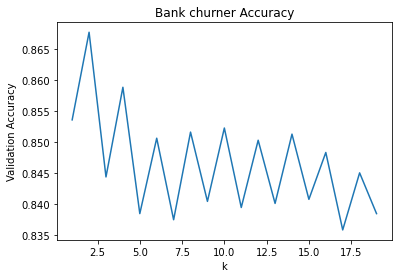

In [31]:
plt.plot(k_list, acc)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Bank churner Accuracy")
plt.show() 

# 3.랜덤포레스트

In [32]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators=500, max_depth=4,random_state=0) 
rt.fit(smote_x_train, smote_y_train)
rt_ypred=rt.predict(x_test)
rt_yproba=rt.predict_proba(x_test)

In [33]:
print('             분류 보고서')
print(classification_report(y_test, rt_ypred))
print('정확도: ',accuracy_score(y_test, rt_ypred))
print('재현율: ',recall_score(y_test, rt_ypred))
print('정밀도: ',precision_score(y_test, rt_ypred))
print('f1점수: ',f1_score(y_test, rt_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, rt_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2543
           1       0.63      0.85      0.72       496

    accuracy                           0.89      3039
   macro avg       0.80      0.88      0.83      3039
weighted avg       0.91      0.89      0.90      3039

정확도:  0.8933859822309971
재현율:  0.8528225806451613
정밀도:  0.6275964391691394
f1점수:  0.723076923076923
ROC-AUC점수:  0.8770601302753923


In [34]:
columns = x_train.columns

feature_importance = pd.DataFrame(rt.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.003417,0.001028,0.001222,0.049477,0.014329,0.004802,0.008984,0.138763,0.01058,0.030056,...,0.249124,0.110761,0.090421,0.023321,0.02026,0.011754,0.002436,0.001631,0.001924,0.000072


In [35]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.249124
Total_Trans_Amt,0.225636
Total_Revolving_Bal,0.138763
Total_Ct_Chng_Q4_Q1,0.110761
Avg_Utilization_Ratio,0.090421


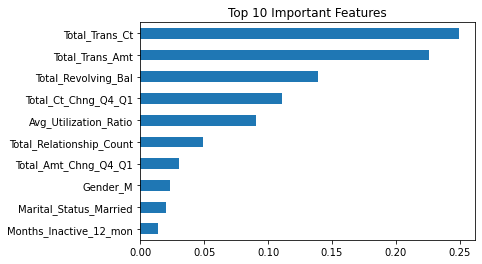

In [36]:
feat_importances = pd.Series(rt.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 4.서포트 벡터 머신

In [37]:
from sklearn.svm import SVC

svc = SVC(C = 1.0, kernel = 'rbf', probability=True)
svc.fit(smote_x_train, smote_y_train)
svc_ypred=svc.predict(x_test)
svc_yproba=svc.predict_proba(x_test)

In [38]:
print('             분류 보고서')
print(classification_report(y_test, svc_ypred))
print('정확도: ',accuracy_score(y_test, svc_ypred))
print('재현율: ',recall_score(y_test, svc_ypred))
print('정밀도: ',precision_score(y_test, svc_ypred))
print('f1점수: ',f1_score(y_test, svc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, svc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      2543
           1       0.33      0.70      0.45       496

    accuracy                           0.71      3039
   macro avg       0.63      0.71      0.63      3039
weighted avg       0.83      0.71      0.75      3039

정확도:  0.7137216189536032
재현율:  0.7036290322580645
정밀도:  0.3255597014925373
f1점수:  0.4451530612244898
ROC-AUC점수:  0.7096595810130275


# 5.나이브 베이즈

In [39]:
# 가우시안 나이브 베이즈
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(smote_x_train, smote_y_train)
gnb_ypred=gnb.predict(x_test)
gnb_yproba=gnb.predict_proba(x_test)

In [40]:
print('             분류 보고서')
print(classification_report(y_test, gnb_ypred))
print('정확도: ',accuracy_score(y_test, gnb_ypred))
print('재현율: ',recall_score(y_test, gnb_ypred))
print('정밀도: ',precision_score(y_test, gnb_ypred))
print('f1점수: ',f1_score(y_test, gnb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gnb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2543
           1       0.39      0.75      0.52       496

    accuracy                           0.77      3039
   macro avg       0.67      0.76      0.68      3039
weighted avg       0.85      0.77      0.80      3039

정확도:  0.7703191839420862
재현율:  0.75
정밀도:  0.39323467230443976
f1점수:  0.5159500693481276
ROC-AUC점수:  0.7621411718442784


In [41]:
# 다항분포 나이브 베이즈
from sklearn.naive_bayes import MultinomialNB

Mnb = MultinomialNB()
Mnb.fit(smote_x_train, smote_y_train)
mnb_ypred=Mnb.predict(x_test)
mnb_yproba=Mnb.predict_proba(x_test)

In [42]:
print('             분류 보고서')
print(classification_report(y_test, mnb_ypred))
print('정확도: ',accuracy_score(y_test, mnb_ypred))
print('재현율: ',recall_score(y_test, mnb_ypred))
print('정밀도: ',precision_score(y_test, mnb_ypred))
print('f1점수: ',f1_score(y_test, mnb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, mnb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      2543
           1       0.22      0.45      0.30       496

    accuracy                           0.66      3039
   macro avg       0.55      0.57      0.54      3039
weighted avg       0.76      0.66      0.70      3039

정확도:  0.6587693320171109
재현율:  0.44556451612903225
정밀도:  0.22482197355035605
f1점수:  0.2988505747126437
ROC-AUC점수:  0.572959214415283


# 6.신경망 MLP 분류

In [43]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'adam', hidden_layer_sizes = (4, 4), learning_rate_init = 0.1)
mlp.fit(smote_x_train, smote_y_train)
mlp_ypred = mlp.predict(x_test)
mlp_yproba=mlp.predict_proba(x_test)

In [44]:
print('             분류 보고서')
print(classification_report(y_test, mlp_ypred))
print('정확도: ',accuracy_score(y_test, mlp_ypred))
print('재현율: ',recall_score(y_test, mlp_ypred))
print('정밀도: ',precision_score(y_test, mlp_ypred))
print('f1점수: ',f1_score(y_test, mlp_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, mlp_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2543
           1       0.16      1.00      0.28       496

    accuracy                           0.16      3039
   macro avg       0.08      0.50      0.14      3039
weighted avg       0.03      0.16      0.05      3039

정확도:  0.163211582757486
재현율:  1.0
정밀도:  0.163211582757486
f1점수:  0.2806223479490806
ROC-AUC점수:  0.5


# 7.Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0,learning_rate=0.5)
gbc.fit(smote_x_train,smote_y_train)
gbc_ypred=gbc.predict(x_test)
gbc_yproba=gbc.predict_proba(x_test)

In [46]:
print('             분류 보고서')
print(classification_report(y_test,gbc_ypred))
print('정확도: ',accuracy_score(y_test, gbc_ypred))
print('재현율: ',recall_score(y_test, gbc_ypred))
print('정밀도: ',precision_score(y_test, gbc_ypred))
print('f1점수: ',f1_score(y_test, gbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2543
           1       0.86      0.92      0.89       496

    accuracy                           0.96      3039
   macro avg       0.92      0.95      0.93      3039
weighted avg       0.96      0.96      0.96      3039

정확도:  0.9631457716354064
재현율:  0.9213709677419355
정밀도:  0.8622641509433963
f1점수:  0.8908382066276804
ROC-AUC점수:  0.9463323576421043


In [47]:
columns = x_train.columns

feature_importance = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.009354,0.000354,0.00111,0.069517,0.006445,0.002376,0.002566,0.103884,0.001251,0.019049,...,0.510204,0.060705,0.000782,0.012953,0.009811,0.013801,0.00909,0.00043,0.000593,0.000332


In [48]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.510204
Total_Trans_Amt,0.165394
Total_Revolving_Bal,0.103884
Total_Relationship_Count,0.069517
Total_Ct_Chng_Q4_Q1,0.060705


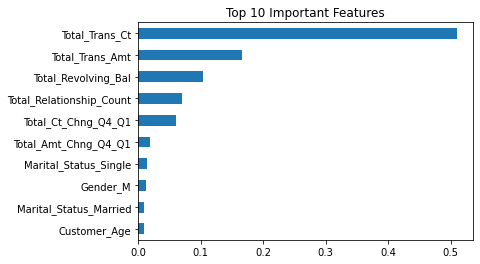

In [49]:
feat_importances = pd.Series(gbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 8.XGBoost classifier

In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=1.0, max_depth =4)
xgb.fit(smote_x_train, smote_y_train)
xgb_ypred = xgb.predict(x_test)
xgb_yproba = xgb.predict_proba(x_test)

[18:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
print('             분류 보고서')
print(classification_report(y_test, xgb_ypred))
print('정확도: ',accuracy_score(y_test, xgb_ypred)) 
print('재현율: ',recall_score(y_test,  xgb_ypred))
print('정밀도: ',precision_score(y_test,  xgb_ypred))
print('f1점수: ',f1_score(y_test,  xgb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, xgb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2543
           1       0.86      0.89      0.87       496

    accuracy                           0.96      3039
   macro avg       0.92      0.93      0.92      3039
weighted avg       0.96      0.96      0.96      3039

정확도:  0.9582099374794341
재현율:  0.8931451612903226
정밀도:  0.8568665377176016
f1점수:  0.8746298124383021
ROC-AUC점수:  0.932022836248779


In [52]:
columns = x_train.columns

feature_importance = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.014318,0.006992,0.007041,0.074302,0.02717,0.014153,0.00652,0.052083,0.00415,0.011538,...,0.206675,0.029247,0.001969,0.061197,0.052538,0.077065,0.266475,0.011515,0.004796,0.02129


In [53]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Marital_Status_Unknown,0.266475
Total_Trans_Ct,0.206675
Marital_Status_Single,0.077065
Total_Relationship_Count,0.074302
Gender_M,0.061197


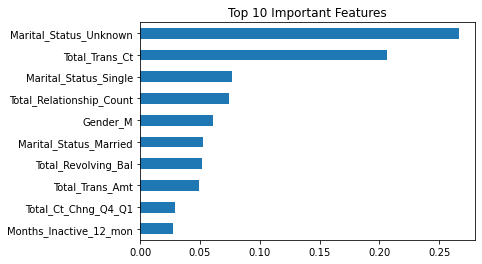

In [54]:
feat_importances = pd.Series(xgb.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 9.LightGBM

In [55]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(smote_x_train, smote_y_train)
lgbm_ypred = lgbm.predict(x_test)
lgbm_yproba = lgbm.predict_proba(x_test)

In [56]:
print('             분류 보고서')
print(classification_report(y_test, lgbm_ypred))
print('정확도: ',accuracy_score(y_test, lgbm_ypred)) 
print('재현율: ',recall_score(y_test,  lgbm_ypred))
print('정밀도: ',precision_score(y_test,  lgbm_ypred))
print('f1점수: ',f1_score(y_test,  lgbm_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, lgbm_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2543
           1       0.89      0.93      0.91       496

    accuracy                           0.97      3039
   macro avg       0.94      0.95      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9687397170121751
재현율:  0.9254032258064516
정밀도:  0.8878143133462283
f1점수:  0.9062191510365252
ROC-AUC점수:  0.9512977591871424


In [57]:
columns = x_train.columns
feature_importance = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,750,262,496,531,287,338,760,687,544,1310,...,1191,1100,369,134,194,136,108,274,293,58


In [58]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Amt,2178
Total_Amt_Chng_Q4_Q1,1310
Total_Trans_Ct,1191
Total_Ct_Chng_Q4_Q1,1100
Credit_Limit,760


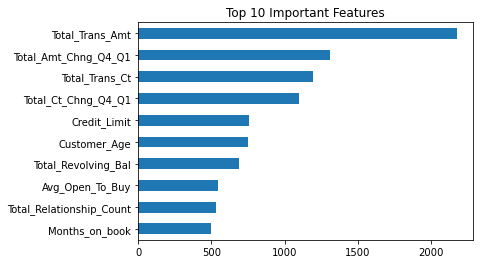

In [59]:
feat_importances = pd.Series(lgbm.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 10.CatBoost

In [60]:
from catboost import CatBoostClassifier, Pool

cbc = CatBoostClassifier()
cbc.fit(smote_x_train, smote_y_train)
cbc_ypred = cbc.predict(x_test)
cbc_yproba = cbc.predict_proba(x_test)

Learning rate set to 0.029676
0:	learn: 0.6559554	total: 189ms	remaining: 3m 8s
1:	learn: 0.6233611	total: 227ms	remaining: 1m 53s
2:	learn: 0.5935512	total: 240ms	remaining: 1m 19s
3:	learn: 0.5623173	total: 249ms	remaining: 1m 2s
4:	learn: 0.5353672	total: 260ms	remaining: 51.7s
5:	learn: 0.5142917	total: 270ms	remaining: 44.8s
6:	learn: 0.4889198	total: 281ms	remaining: 39.8s
7:	learn: 0.4643180	total: 300ms	remaining: 37.3s
8:	learn: 0.4449823	total: 313ms	remaining: 34.5s
9:	learn: 0.4280969	total: 323ms	remaining: 32s
10:	learn: 0.4140118	total: 336ms	remaining: 30.3s
11:	learn: 0.4012699	total: 348ms	remaining: 28.7s
12:	learn: 0.3888746	total: 364ms	remaining: 27.6s
13:	learn: 0.3781133	total: 374ms	remaining: 26.3s
14:	learn: 0.3663815	total: 384ms	remaining: 25.2s
15:	learn: 0.3542312	total: 397ms	remaining: 24.4s
16:	learn: 0.3459846	total: 409ms	remaining: 23.7s
17:	learn: 0.3374095	total: 420ms	remaining: 22.9s
18:	learn: 0.3287533	total: 432ms	remaining: 22.3s
19:	learn: 

164:	learn: 0.0928397	total: 2.2s	remaining: 11.1s
165:	learn: 0.0923067	total: 2.21s	remaining: 11.1s
166:	learn: 0.0919520	total: 2.23s	remaining: 11.1s
167:	learn: 0.0917164	total: 2.24s	remaining: 11.1s
168:	learn: 0.0912322	total: 2.25s	remaining: 11.1s
169:	learn: 0.0909887	total: 2.26s	remaining: 11s
170:	learn: 0.0908231	total: 2.27s	remaining: 11s
171:	learn: 0.0904780	total: 2.28s	remaining: 11s
172:	learn: 0.0901659	total: 2.29s	remaining: 11s
173:	learn: 0.0899303	total: 2.3s	remaining: 10.9s
174:	learn: 0.0896994	total: 2.31s	remaining: 10.9s
175:	learn: 0.0894124	total: 2.32s	remaining: 10.9s
176:	learn: 0.0892058	total: 2.33s	remaining: 10.8s
177:	learn: 0.0889947	total: 2.34s	remaining: 10.8s
178:	learn: 0.0888038	total: 2.35s	remaining: 10.8s
179:	learn: 0.0884393	total: 2.36s	remaining: 10.8s
180:	learn: 0.0882213	total: 2.38s	remaining: 10.8s
181:	learn: 0.0880043	total: 2.39s	remaining: 10.8s
182:	learn: 0.0876435	total: 2.41s	remaining: 10.7s
183:	learn: 0.0873545	

333:	learn: 0.0568162	total: 4.17s	remaining: 8.31s
334:	learn: 0.0566090	total: 4.18s	remaining: 8.3s
335:	learn: 0.0564175	total: 4.19s	remaining: 8.28s
336:	learn: 0.0562235	total: 4.21s	remaining: 8.28s
337:	learn: 0.0561015	total: 4.22s	remaining: 8.26s
338:	learn: 0.0560076	total: 4.23s	remaining: 8.25s
339:	learn: 0.0558562	total: 4.24s	remaining: 8.23s
340:	learn: 0.0556277	total: 4.25s	remaining: 8.22s
341:	learn: 0.0554622	total: 4.26s	remaining: 8.2s
342:	learn: 0.0553061	total: 4.27s	remaining: 8.19s
343:	learn: 0.0552186	total: 4.29s	remaining: 8.18s
344:	learn: 0.0550245	total: 4.3s	remaining: 8.16s
345:	learn: 0.0549503	total: 4.31s	remaining: 8.14s
346:	learn: 0.0547903	total: 4.33s	remaining: 8.14s
347:	learn: 0.0546877	total: 4.34s	remaining: 8.12s
348:	learn: 0.0545963	total: 4.35s	remaining: 8.11s
349:	learn: 0.0545359	total: 4.36s	remaining: 8.1s
350:	learn: 0.0544576	total: 4.37s	remaining: 8.09s
351:	learn: 0.0542874	total: 4.38s	remaining: 8.07s
352:	learn: 0.05

504:	learn: 0.0383793	total: 6.13s	remaining: 6.01s
505:	learn: 0.0383564	total: 6.14s	remaining: 5.99s
506:	learn: 0.0383142	total: 6.15s	remaining: 5.98s
507:	learn: 0.0381490	total: 6.16s	remaining: 5.97s
508:	learn: 0.0381192	total: 6.17s	remaining: 5.95s
509:	learn: 0.0380689	total: 6.18s	remaining: 5.94s
510:	learn: 0.0380143	total: 6.2s	remaining: 5.93s
511:	learn: 0.0379024	total: 6.21s	remaining: 5.92s
512:	learn: 0.0377904	total: 6.22s	remaining: 5.91s
513:	learn: 0.0376950	total: 6.24s	remaining: 5.9s
514:	learn: 0.0376203	total: 6.25s	remaining: 5.89s
515:	learn: 0.0375259	total: 6.26s	remaining: 5.88s
516:	learn: 0.0374356	total: 6.29s	remaining: 5.87s
517:	learn: 0.0373276	total: 6.3s	remaining: 5.86s
518:	learn: 0.0372478	total: 6.31s	remaining: 5.85s
519:	learn: 0.0371617	total: 6.33s	remaining: 5.84s
520:	learn: 0.0371216	total: 6.34s	remaining: 5.83s
521:	learn: 0.0370667	total: 6.35s	remaining: 5.82s
522:	learn: 0.0370477	total: 6.37s	remaining: 5.8s
523:	learn: 0.03

670:	learn: 0.0280903	total: 8.69s	remaining: 4.26s
671:	learn: 0.0280189	total: 8.71s	remaining: 4.25s
672:	learn: 0.0279829	total: 8.73s	remaining: 4.24s
673:	learn: 0.0279346	total: 8.75s	remaining: 4.23s
674:	learn: 0.0278963	total: 8.76s	remaining: 4.22s
675:	learn: 0.0278547	total: 8.77s	remaining: 4.2s
676:	learn: 0.0278185	total: 8.78s	remaining: 4.19s
677:	learn: 0.0277898	total: 8.8s	remaining: 4.18s
678:	learn: 0.0277724	total: 8.81s	remaining: 4.17s
679:	learn: 0.0277660	total: 8.82s	remaining: 4.15s
680:	learn: 0.0277232	total: 8.84s	remaining: 4.14s
681:	learn: 0.0276675	total: 8.85s	remaining: 4.13s
682:	learn: 0.0276040	total: 8.87s	remaining: 4.12s
683:	learn: 0.0275651	total: 8.89s	remaining: 4.11s
684:	learn: 0.0274625	total: 8.9s	remaining: 4.09s
685:	learn: 0.0274200	total: 8.91s	remaining: 4.08s
686:	learn: 0.0273997	total: 8.92s	remaining: 4.06s
687:	learn: 0.0273518	total: 8.93s	remaining: 4.05s
688:	learn: 0.0273054	total: 8.94s	remaining: 4.04s
689:	learn: 0.0

845:	learn: 0.0211909	total: 11.1s	remaining: 2.01s
846:	learn: 0.0211792	total: 11.1s	remaining: 2s
847:	learn: 0.0211404	total: 11.1s	remaining: 1.99s
848:	learn: 0.0211014	total: 11.1s	remaining: 1.97s
849:	learn: 0.0210607	total: 11.1s	remaining: 1.96s
850:	learn: 0.0210537	total: 11.1s	remaining: 1.94s
851:	learn: 0.0210182	total: 11.1s	remaining: 1.93s
852:	learn: 0.0209761	total: 11.1s	remaining: 1.92s
853:	learn: 0.0209276	total: 11.1s	remaining: 1.9s
854:	learn: 0.0208744	total: 11.2s	remaining: 1.89s
855:	learn: 0.0208464	total: 11.2s	remaining: 1.88s
856:	learn: 0.0207756	total: 11.2s	remaining: 1.86s
857:	learn: 0.0207590	total: 11.2s	remaining: 1.85s
858:	learn: 0.0207094	total: 11.2s	remaining: 1.84s
859:	learn: 0.0206819	total: 11.2s	remaining: 1.82s
860:	learn: 0.0206200	total: 11.2s	remaining: 1.81s
861:	learn: 0.0205643	total: 11.2s	remaining: 1.8s
862:	learn: 0.0205320	total: 11.2s	remaining: 1.78s
863:	learn: 0.0205141	total: 11.3s	remaining: 1.77s
864:	learn: 0.020

In [61]:
print('             분류 보고서')
print(classification_report(y_test, cbc_ypred))
print('정확도: ',accuracy_score(y_test, cbc_ypred)) 
print('재현율: ',recall_score(y_test,  cbc_ypred))
print('정밀도: ',precision_score(y_test,  cbc_ypred))
print('f1점수: ',f1_score(y_test,  cbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, cbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2543
           1       0.88      0.93      0.90       496

    accuracy                           0.97      3039
   macro avg       0.93      0.95      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9680816057913787
재현율:  0.9314516129032258
정밀도:  0.88
f1점수:  0.9049951028403525
ROC-AUC점수:  0.9533388618979362


In [62]:
columns = x_train.columns
feature_importance = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,2.910869,0.696349,0.834027,6.1528,1.307368,1.424992,3.673286,5.840174,1.56436,5.404666,...,27.688736,4.659002,1.495051,2.114041,2.991463,1.688269,0.801653,2.077092,0.574539,0.137757


In [63]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,27.688736
Total_Trans_Amt,25.963505
Total_Relationship_Count,6.152800
Total_Revolving_Bal,5.840174
Total_Amt_Chng_Q4_Q1,5.404666


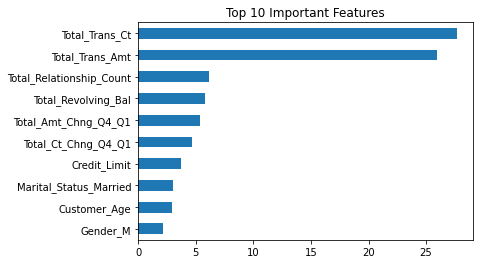

In [64]:
feat_importances = pd.Series(cbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 각 모델별 점수 비교

In [65]:
Comparison = pd.DataFrame({'LogReg':[accuracy_score(y_test, lgr_ypred),recall_score(y_test,  lgr_ypred),precision_score(y_test,  lgr_ypred),f1_score(y_test,  lgr_ypred),roc_auc_score(y_test, lgr_ypred)],
'KNN':[accuracy_score(y_test, knn_ypred),recall_score(y_test,  knn_ypred),precision_score(y_test,  knn_ypred),f1_score(y_test,  knn_ypred),roc_auc_score(y_test, knn_ypred)],
'RandFor':[accuracy_score(y_test, rt_ypred),recall_score(y_test,  rt_ypred),precision_score(y_test,  rt_ypred),f1_score(y_test,  rt_ypred),roc_auc_score(y_test, rt_ypred)],    
'SVM':[accuracy_score(y_test, svc_ypred),recall_score(y_test,  svc_ypred),precision_score(y_test,  svc_ypred),f1_score(y_test,  svc_ypred),roc_auc_score(y_test, svc_ypred)],
'GNB':[accuracy_score(y_test, gnb_ypred),recall_score(y_test,  gnb_ypred),precision_score(y_test,  gnb_ypred),f1_score(y_test,  gnb_ypred),roc_auc_score(y_test, gnb_ypred)],
"MNB":[accuracy_score(y_test, mnb_ypred),recall_score(y_test,  mnb_ypred),precision_score(y_test,  mnb_ypred),f1_score(y_test,  mnb_ypred),roc_auc_score(y_test, mnb_ypred)],
"MLP":[accuracy_score(y_test, mlp_ypred),recall_score(y_test,  mlp_ypred),precision_score(y_test,  mlp_ypred),f1_score(y_test,  mlp_ypred),roc_auc_score(y_test, mlp_ypred)],
"GradBoost":[accuracy_score(y_test, gbc_ypred),recall_score(y_test,  gbc_ypred),precision_score(y_test,  gbc_ypred),f1_score(y_test,  gbc_ypred),roc_auc_score(y_test, gbc_ypred)],
"XGBoost":[accuracy_score(y_test, xgb_ypred),recall_score(y_test,  xgb_ypred),precision_score(y_test,  xgb_ypred),f1_score(y_test,  xgb_ypred),roc_auc_score(y_test, xgb_ypred)],
"LightGBM":[accuracy_score(y_test, lgbm_ypred),recall_score(y_test,  lgbm_ypred),precision_score(y_test,  lgbm_ypred),f1_score(y_test,  lgbm_ypred),roc_auc_score(y_test, lgbm_ypred)],
'CatBoost':[accuracy_score(y_test, cbc_ypred),recall_score(y_test,  cbc_ypred),precision_score(y_test,  cbc_ypred),f1_score(y_test,  cbc_ypred),roc_auc_score(y_test, cbc_ypred)]},
                          index = ['ACC', 'Recall', 'Precision', 'F1', 'ROC-AUC'])
Comparison

,LogReg,KNN,RandFor,SVM,GNB,MNB,MLP,GradBoost,XGBoost,LightGBM,CatBoost
ACC,0.795656,0.867720,0.893386,0.713722,0.770319,0.658769,0.163212,0.963146,0.958210,0.968740,0.968082
Recall,0.701613,0.602823,0.852823,0.703629,0.750000,0.445565,1.000000,0.921371,0.893145,0.925403,0.931452
Precision,0.423873,0.593254,0.627596,0.325560,0.393235,0.224822,0.163212,0.862264,0.856867,0.887814,0.880000
F1,0.528474,0.598000,0.723077,0.445153,0.515950,0.298851,0.280622,0.890838,0.874630,0.906219,0.904995
ROC-AUC,0.757806,0.761105,0.877060,0.709660,0.762141,0.572959,0.500000,0.946332,0.932023,0.951298,0.953339


In [66]:
Comparison.max(axis=1)

ACC          0.968740
Recall       1.000000
Precision    0.887814
F1           0.906219
ROC-AUC      0.953339
dtype: float64

In [73]:
result = Comparison.max(axis=1)
result.index = Comparison.idxmax(axis=1)
result.index

Index(['LightGBM', 'MLP', 'LightGBM', 'LightGBM', 'CatBoost'], dtype='object')

In [67]:
top4 = Comparison[['GradBoost', 'XGBoost', 'LightGBM', 'CatBoost']]
top4

,GradBoost,XGBoost,LightGBM,CatBoost
ACC,0.963146,0.958210,0.968740,0.968082
Recall,0.921371,0.893145,0.925403,0.931452
Precision,0.862264,0.856867,0.887814,0.880000
F1,0.890838,0.874630,0.906219,0.904995
ROC-AUC,0.946332,0.932023,0.951298,0.953339


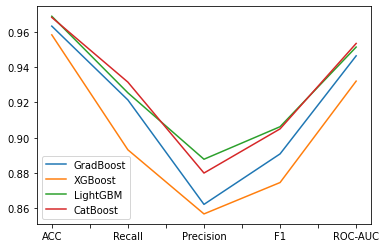

In [68]:
top4.plot()
plt.show()

# Top4 모델별 Feature importance 비교

In [69]:
# Gradient Boosting Classifier
grad_df = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
grad_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.510204
Total_Trans_Amt,0.165394
Total_Revolving_Bal,0.103884
Total_Relationship_Count,0.069517
Total_Ct_Chng_Q4_Q1,0.060705


In [70]:
# XGbBoost
xgboost_df = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
xgboost_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Marital_Status_Unknown,0.266475
Total_Trans_Ct,0.206675
Marital_Status_Single,0.077065
Total_Relationship_Count,0.074302
Gender_M,0.061197


In [71]:
# LightGBM
lightgbm_df = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
lightgbm_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Amt,2178
Total_Amt_Chng_Q4_Q1,1310
Total_Trans_Ct,1191
Total_Ct_Chng_Q4_Q1,1100
Credit_Limit,760


In [72]:
# CatBoost
cat_df = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
cat_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,27.688736
Total_Trans_Amt,25.963505
Total_Relationship_Count,6.152800
Total_Revolving_Bal,5.840174
Total_Amt_Chng_Q4_Q1,5.404666
